<a href="https://colab.research.google.com/github/kulkarnivinayv/Credit-Card-Default-Prediction/blob/main/Vinay_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ankita Path
# path="/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone /ML Classification - Credit Card Default Prediction/default of credit card clients.xls - Data.csv"

# Aadarsh's Path
# path="/content/drive/MyDrive/Datasets/default of credit card clients.xls - Data.csv"

# Vandana Path
# path= "/content/default of credit card clients.xls - Data.csv"

# Vinay path
path = "/content/drive/MyDrive/Colab Notebooks/Credit Card Default Prediction /default of credit card clients.xls - Data.csv"
df = pd.read_csv(path , header=0, encoding= 'unicode_escape')




In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Remove the extra first column and row

#drop Unnamed column

df=df.drop(['Unnamed: 0'],axis=1)

#replace header with first row

df.columns = df.iloc[0]
df = df[1:]

# Have a look at new dataset
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

***It is osereved that all the columns are of object datatype. For the  further efficient analysis required to convert all columns into another datatype as follow.***

In [ ]:
# convert all DataFrame columns to the int64 dtype as all the values are in int

df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

***Now, the Dataframe has 30000 rows and 24 columns with int64 as datatype.***


***All columns are numeric.***

In [ ]:
# Find the unique values within each column of dataframe

df.nunique()

0
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

***These unique value calculation method helps us to know how to use these columns as feature vector.***

In [ ]:
# The statsical findings can be studied from given Dataframes with describe method.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


***The statsical findings can be studied from given Dataframes with describe method.***

# **Preprocessing the dataset**

In [ ]:
# Looking for missing values in the Dataframe

df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

***Zero null entries are there in the given Dataframe. This saves our time and efforts.***

**Looking for duplicate rows present in Dataframe**

In [ ]:
dv = df.duplicated().sum()

print(f'In dataset, {dv} Duplicate values are present')

In dataset, 35 Duplicate values are present


***It is found that Dataframe contains 35 duplcate entries. These entires need to be deleted for better classification results.***

In [ ]:
# dropping the duplicate rows

df=df.drop_duplicates()

In [ ]:
# Lets check the size of new 

df.shape

(29965, 24)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

# **Exploratory Data Analysis (EDA)**

***For the further analysis, choose the one column as dependant variable. The last column in the Dateframe "default payment next month" will be choosen as dependent variable for further findings.***

In [ ]:
#rename the "default payment next month" column to "Is Defaulter"

df.rename(columns={'default payment next month':'IsDefaulter'}, inplace=True)

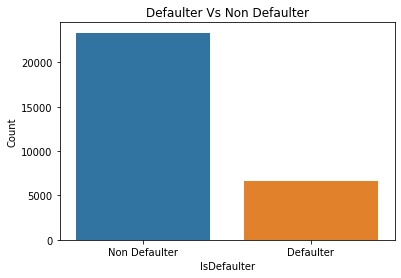

In [ ]:
#plot countplot of IsDefaulter

ax= sns.countplot(df['IsDefaulter'])

#set title and labels
plt.title('Defaulter Vs Non Defaulter')
plt.xlabel('IsDefaulter')
plt.ylabel('Count')

ax.set_xticklabels(['Non Defaulter', 'Defaulter'])
plt.show()

From above graph it is found that there are more Non-Defaulter people than Defaulter. 

In [ ]:
df['IsDefaulter'].value_counts()

0    23335
1     6630
Name: IsDefaulter, dtype: int64

***In terms of numbers 23335 are Non-Defaulter and only 6630 are avail the facility as Defaulter.***

###**Have a look at Independent Columns from Dataframe.**

### **1. GENDER**

In [ ]:
#checking unique values

df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

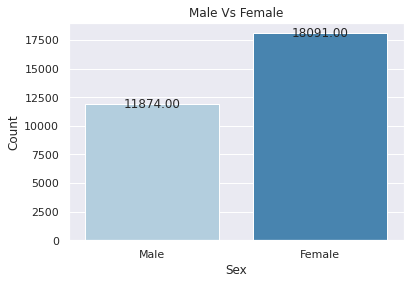

In [ ]:
#plot countplot of Gender

sns.set(style='darkgrid')
ax=sns.countplot(df['SEX'],palette='Blues')

#set title and labels

plt.title('Male Vs Female')
plt.xlabel('Sex')
plt.ylabel('Count')

ax.set_xticklabels(['Male', 'Female'])

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')
plt.show()

***The dataset contians 18091 entries of Female and 11874 of Male. It indicates the usage of credit card is more in Female comapred to Male.***

### **2. EDUCATION**

In [ ]:
# Unique values of EDUCATION column

df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***The number of records are less for 0, 4, 5, 6. And records for 2, 1 are in thousands. Hence to make better analysis, combine the records of 4, 5, 6 with records of 0.***

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14019
1    10563
3     4915
0      468
Name: EDUCATION, dtype: int64

[Text(0, 0, 'Others'),
 Text(0, 0, 'Graduate School'),
 Text(0, 0, 'University'),
 Text(0, 0, 'high school')]

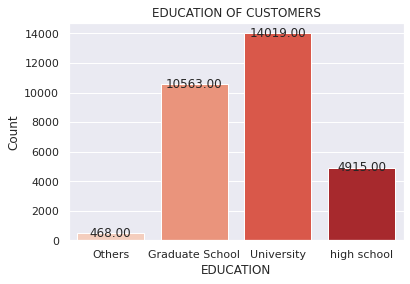

In [ ]:
#plot countplot of EDUCATION

ax=sns.countplot(df['EDUCATION'],palette='Reds')

#set title and labels
plt.title('EDUCATION OF CUSTOMERS')
plt.xlabel('EDUCATION')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')

ax.set_xticklabels(['Others', 'Graduate School', 'University', 'high school'])

***It is found that use of credit cards increases with higher education.***

**3. MARRIAGE**

In [ ]:
# checking unique values of MARRIAGE column

df["MARRIAGE"].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# There are not much records in 3 and 0 values.
# Therefore, aggregating them

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

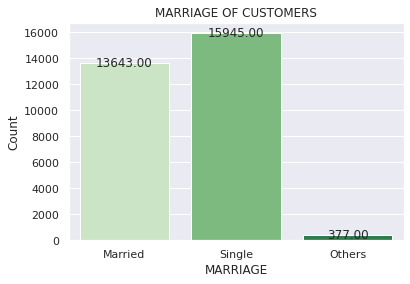

In [ ]:
#plot countplot of MARRIAGE
ax=sns.countplot(df['MARRIAGE'],palette='Greens')

#set title and labels
plt.title('MARRIAGE OF CUSTOMERS')
plt.xlabel('MARRIAGE')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')
#set x axis labels
ax.set_xticklabels(['Married', 'Single', 'Others'])
plt.show()

***Very few people from other category are having credit cards. The usage of credit card is found more in single person than married person.***

### **To do the further EDA part, need to in details of different features and comparison as perfomace in defaulter and non-defaulter count. Find the catogerical features and assign the proper labels to each category.**

In [ ]:
#Create new Dataframe for categorical variables

df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['Defaulter'] = df['IsDefaulter']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

### **Compare Defaulter category with respect to Gender**

In [ ]:
#percentage fucntion to show on top of bars

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12,verticalalignment='bottom')
    plt.show()

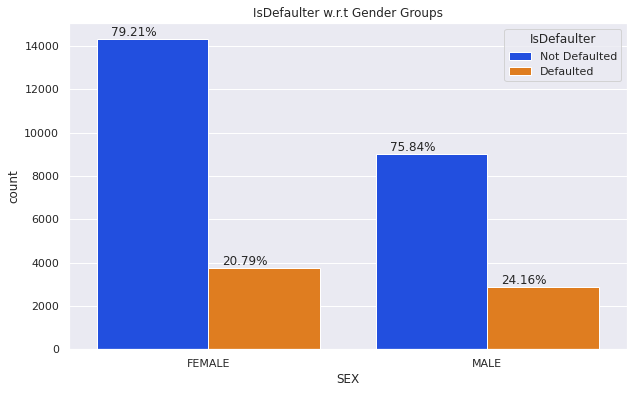

In [ ]:
# Plotting sex and defaulter data in df_cat using countplot

plt.figure(figsize = (10,6))
ax = sns.countplot(x="SEX", hue="Defaulter",data =df_cat, palette='bright')
plt.title('IsDefaulter w.r.t Gender Groups')
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.SEX,2,2)

***Males having slightly higher number for defaulted category. The number of non defaulted category females are higher (around 80%) than males (76%).***

### **Comapre the number of Defaulters with respect to Education and Gender**

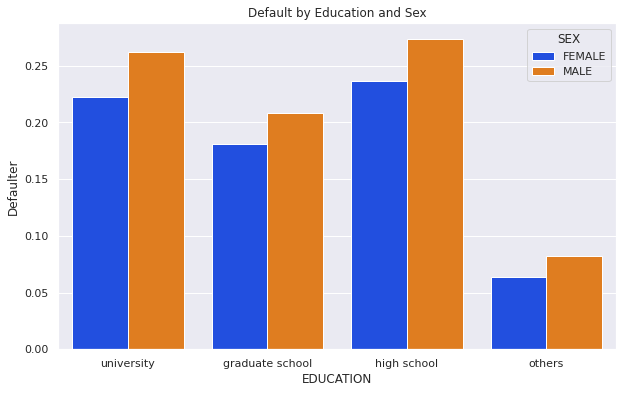

In [ ]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
sns.barplot(x="EDUCATION", y="Defaulter", hue="SEX", data=df_cat,palette='bright', ci=None)
plt.title("Default by Education and Sex")
plt.show()

***In all Education groups , Male members have defaulted more. On that particularly high school male members are defaulted higher than others.***

### **Analyze the Dataframe as Marital Status with respect to Defaulters**

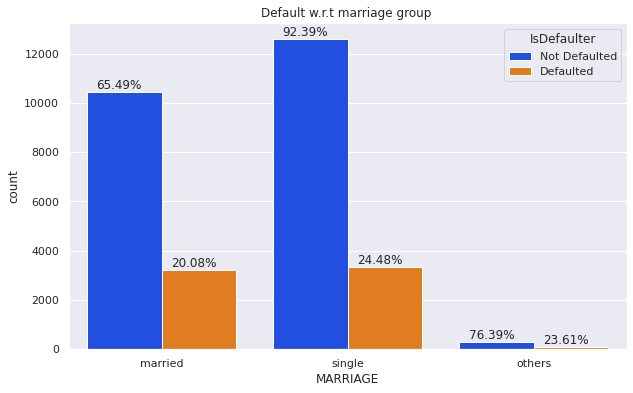

In [ ]:
#Plotting data using countplot

plt.figure(figsize = (10,6))
ax = sns.countplot(x='MARRIAGE',hue='Defaulter',data=df_cat,palette='bright')
plt.title("Default w.r.t marriage group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.MARRIAGE,3,2)
plt.show()

***The above graph shows that single persons are more in number (92.39%) for not defaulted catogery. Even it can be observed that, the count for Defaulted catogery is more in case of person with maritial status signle. This is important point for the credit card manufacturing companies.***

### **Comparison of count of Defaulters with respect to Age parameter**

In [ ]:
#rename PAY_0 to PAY_1
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
#create a condition to check whhether the customer defaulted even once

default_once = (df.PAY_1>1) | (df.PAY_2>1) | (df.PAY_3>1) | (df.PAY_4>1) | (df.PAY_5>1) | (df.PAY_6>1)

df.loc[default_once, "has_def"] = 1

df.loc[df.has_def.isna(), "has_def"] = 0

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,has_def
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,has_def
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.780277,1.557283,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258,0.279626
std,129760.135222,0.489128,0.728525,0.521431,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.448823
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000,1.000000
max,1000000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000


***Minimum age is 21 and maximum age is 79. Hence create some some bins to group them.***

In [ ]:
#create age bins for AGE column

bins = [21, 30, 40, 50, 60, 70, 80]

labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df_age = df['AGE']
df_age

1        24
2        26
3        34
4        37
5        57
         ..
29996    39
29997    43
29998    37
29999    41
30000    46
Name: AGE, Length: 29965, dtype: int64

In [ ]:
df_age['AGE'] = pd.cut(df_age, bins=bins, labels=labels,right=False)

In [ ]:
# create a function to create stacked bargraph with percentage
def stacked_bar(column_name):
    
    #get the percentage of default by each group
    group_default = pd.crosstab(index = df['has_def'],columns= df_age[column_name], normalize='columns')

    #round the percentage to 2 decimal places
    group_default = group_default.apply(lambda x: round(x,2))

    #create labels for the stacked bar plot
    labels = group_default.columns
    list1 = group_default.iloc[0].to_list()
    list2 = group_default.iloc[1].to_list()

    #create names for list1 and list2
    list1_name = 'No Default'
    list2_name = 'Has Default'

    #create title for the plot defaly by column_name
    title = 'Default by ' + column_name

    #create xlabel and ylabel for the plot
    xlabel = column_name
    ylabel = 'Percentage'

    #set figure size
    fig, ax = plt.subplots(figsize=(10,6))
    bar_width = 0.50
    #set axis labels
    ax1 = ax.bar(labels, list1, bar_width, label=list1_name)
    ax2 = ax.bar(labels, list2, bar_width, label=list2_name, bottom=list1)

 #set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #set legend
    plt.legend(loc = 'best')

    #set tick labels
    plt.xticks(list(range(len(labels))), labels, rotation=90)
    plt.yticks(np.arange(0, 1.1, 0.1))

    #set grid
    plt.grid(True)

    #set heights and get texts for bars in axis 1 and 2
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

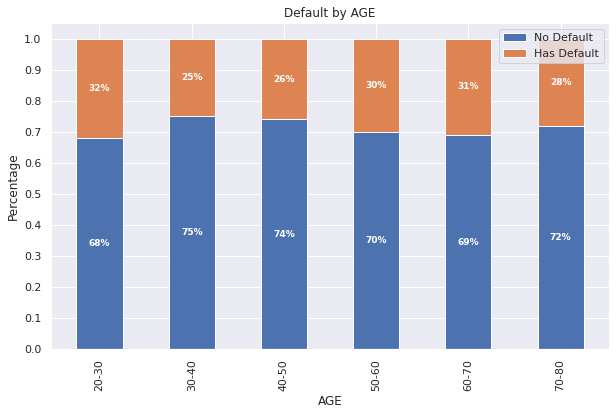

In [ ]:
stacked_bar('AGE')

***Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.***

### **Comparison of Credit Limit with respect to number of Defaulters**

Text(0, 0.5, 'LIMIT_BAL')

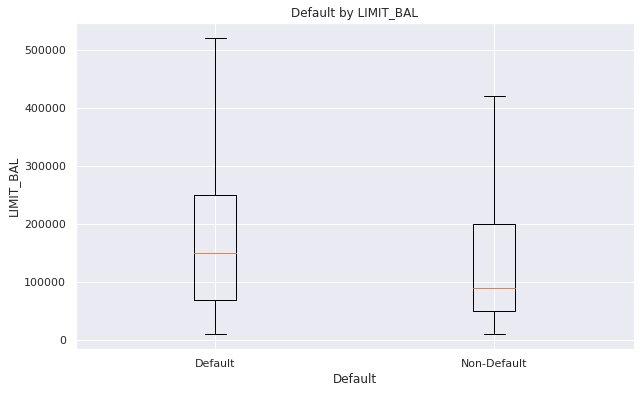

In [ ]:
#create dfs for default and non-default with LIMIT_BAL column

def0 = df.loc[df['IsDefaulter'] == 0,'LIMIT_BAL']
def1 = df.loc[df['IsDefaulter'] == 1,'LIMIT_BAL']

#plot the boxplot for default and non-default

plt.figure(figsize=(10,6))
plt.boxplot([def0, def1], labels=['Default', 'Non-Default'], showfliers=False)

#set title and axis labels

plt.title('Default by LIMIT_BAL')
plt.xlabel('Default')
plt.ylabel('LIMIT_BAL')

***Customers with high credit limits tend to have higher 'no-default' rate.***

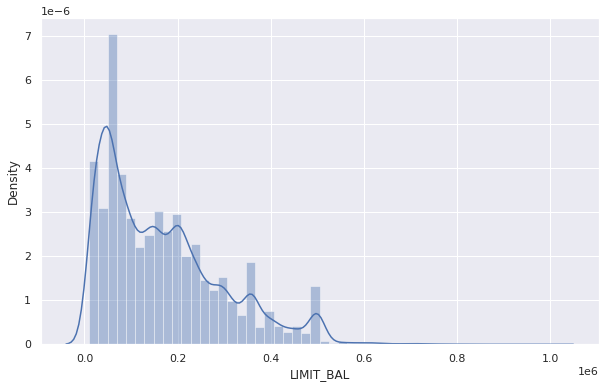

In [ ]:
#distplot for LIMIT_BAL
plt.figure(figsize=(10,6))
sns.distplot(df['LIMIT_BAL'],kde=True,bins=50)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,has_def
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


**Bill Amount Columns**

In [ ]:
#rename the PAY COLUMNS
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}, inplace=True)

#rename the BILL_AMT COLUMNS
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace=True)

#rename the PAY_AMT COLUMNS
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

In [ ]:
#create bill_amount_ df with bill_amount_sept, bill_amount_aug, bill_amount_jul, bill_amount_jun, bill_amount_may, bill_amount_apr

bill_amount_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

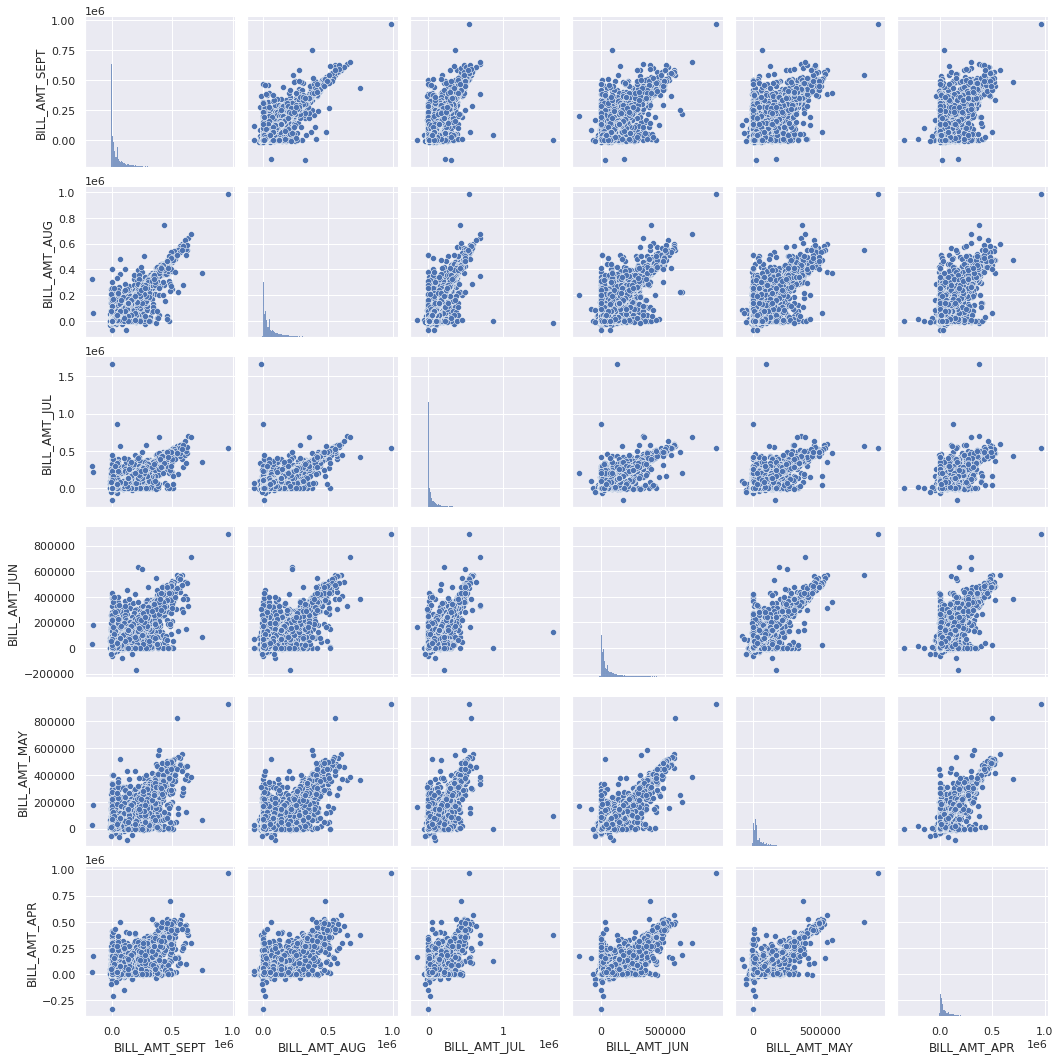

In [ ]:
#plot pairplot for bill_amount_df
sns.pairplot(bill_amount_df)

**Payment Status**

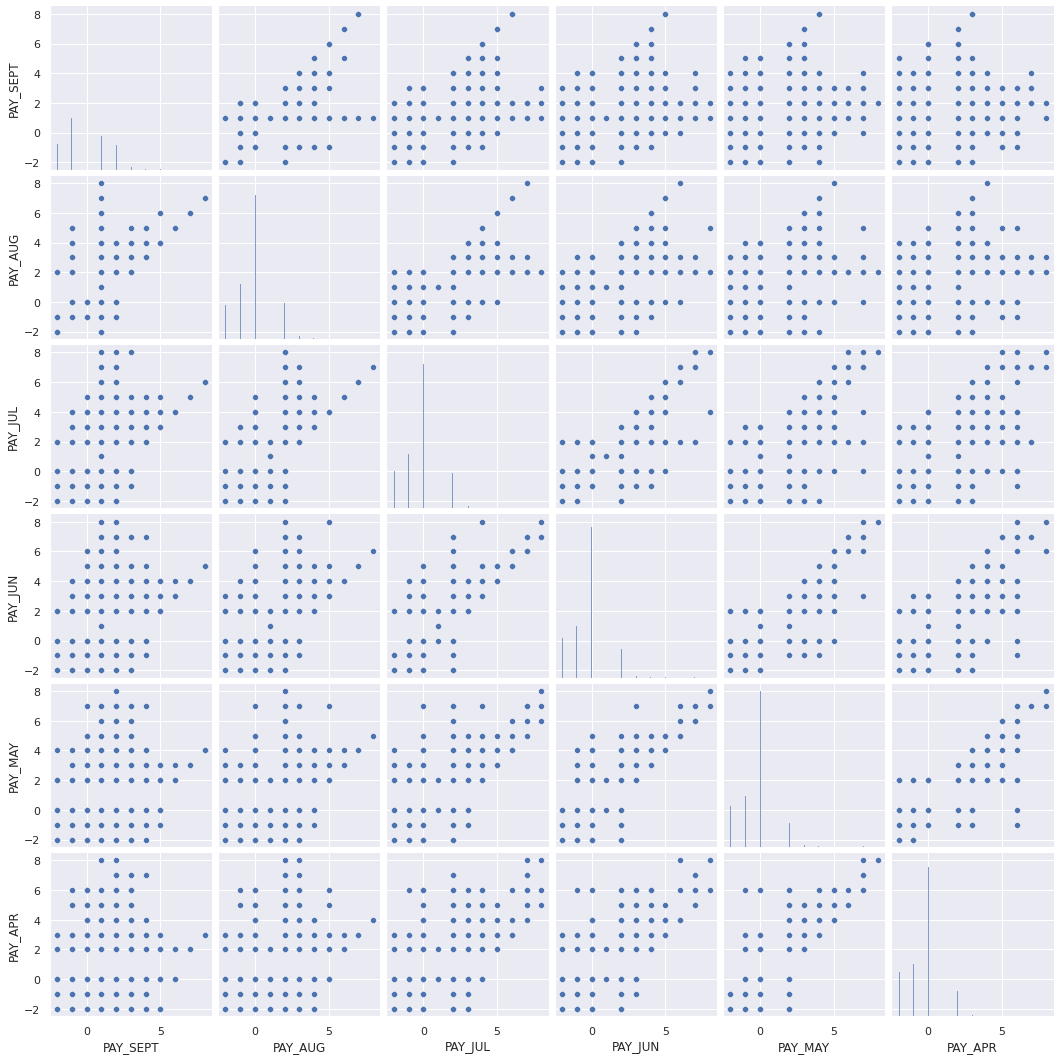

In [ ]:
pay_columns_df = df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']]

#plot pairplot for pay_columns
sns.pairplot(pay_columns_df)

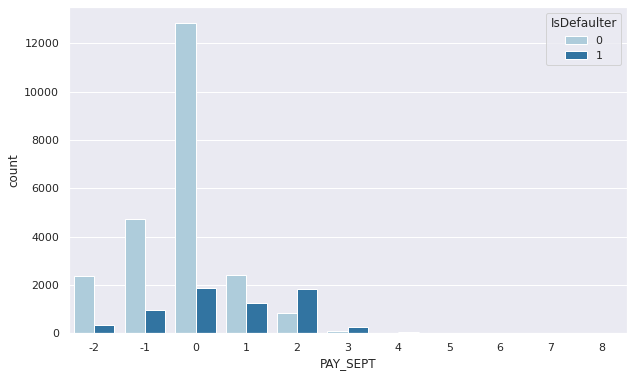

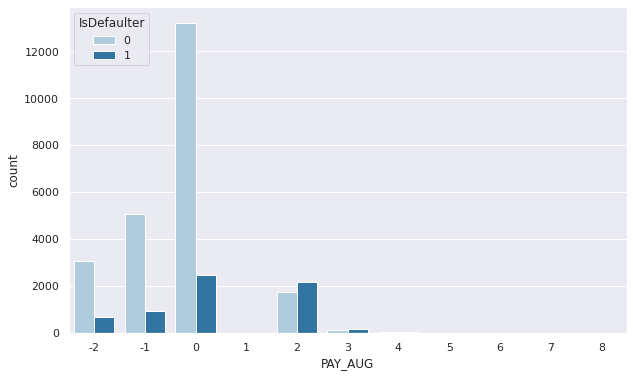

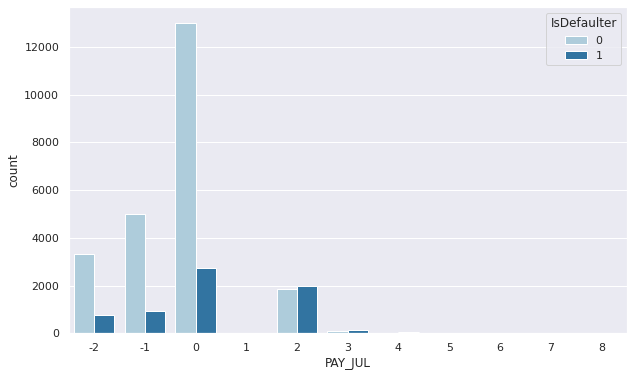

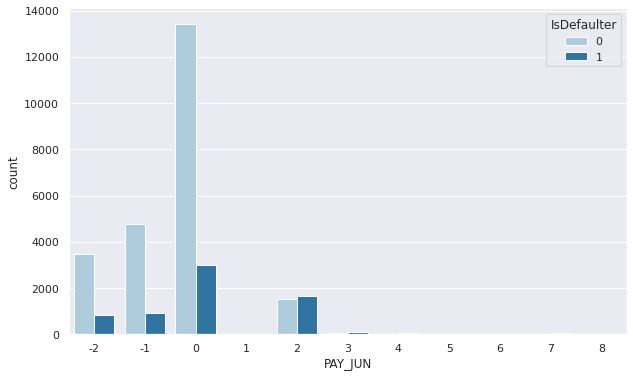

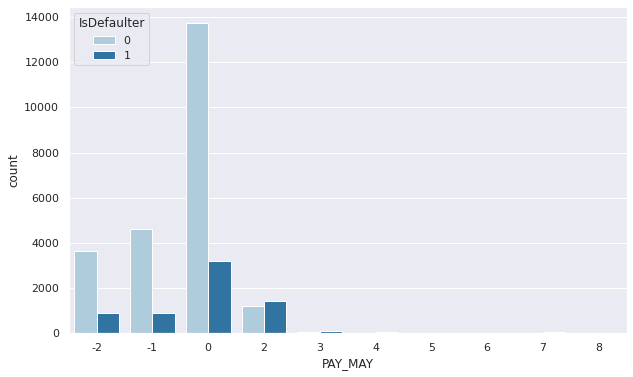

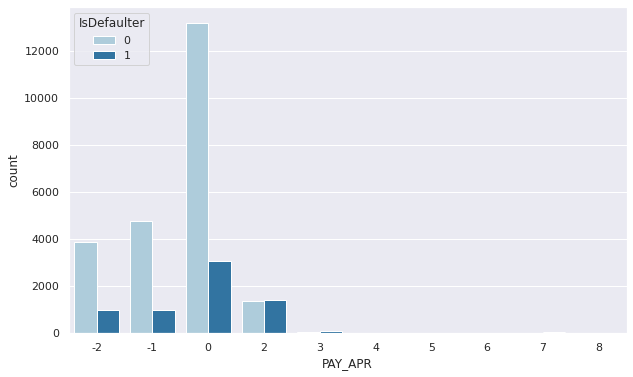

In [ ]:
#create a col with pay cols
pay_columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

#create countplot for each column in pay_amount_col
for i in pay_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x=i, data=df, hue='IsDefaulter',palette='Paired')

**Already Paid Amounts**

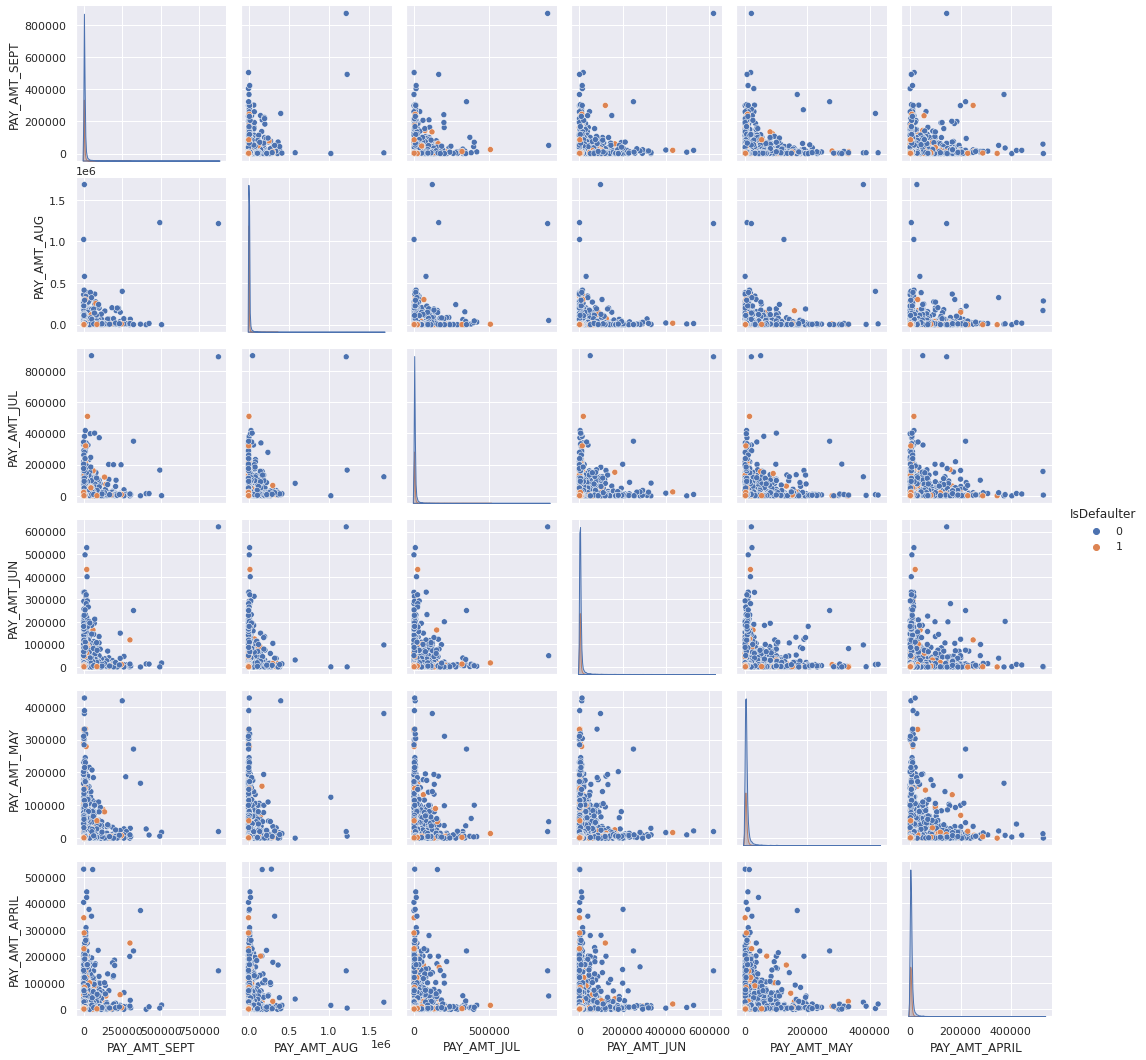

In [ ]:
#Plotting paid amount using pairplot
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APRIL', 'IsDefaulter']]
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

**Imbalanced Data Set of Target Variable**

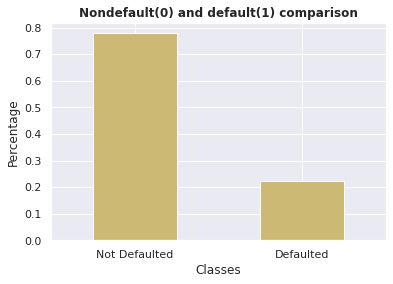

In [ ]:
#create a df df for is default column
imb_df = df['IsDefaulter'].value_counts(normalize=True)

ax=imb_df.plot(kind='bar',color='y')

plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [ ]:
imb_df

0    0.778742
1    0.221258
Name: IsDefaulter, dtype: float64

**Applying SMOTE Technique**

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(oversampled_Y))

Original dataset shape 29965
Resampled dataset shape 46670


**Feature Engineering on Columns**

In [ ]:
#creating columns list
columns = list(df.columns)

In [ ]:
#Remove the last column
columns.pop()

'has_def'

In [ ]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(oversampled_X,columns=columns)

In [ ]:
balanced_df['IsDefaulter'] = oversampled_Y

In [ ]:
#check shape of new dataframe
balanced_df.shape

(46670, 24)

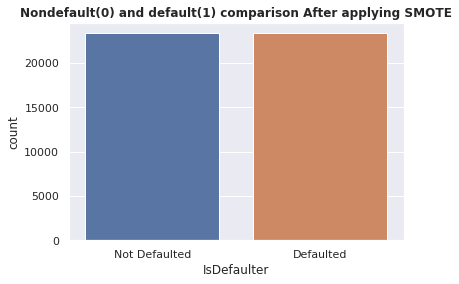

In [ ]:
#plotting balanced data using countplot
ax = sns.countplot('IsDefaulter', data = balanced_df)
plt.title('Nondefault(0) and default(1) comparison After applying SMOTE',fontweight = "bold")
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [ ]:
#creating new column 
balanced_df['Payement_Value'] = balanced_df['PAY_SEPT'] + balanced_df['PAY_AUG'] + balanced_df['PAY_JUL'] + balanced_df['PAY_JUN'] + balanced_df['PAY_MAY'] + balanced_df['PAY_APR']

In [ ]:
#check mean of new feature wrt to default
balanced_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.970902
1    1.663810
Name: Payement_Value, dtype: float64

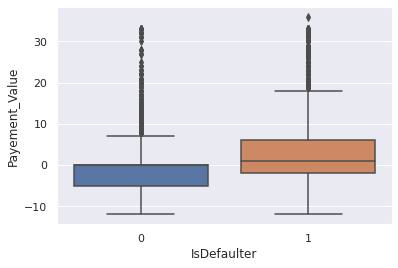

In [ ]:
#Plot new feature using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
#create new feature dues
balanced_df['Dues'] = (balanced_df['BILL_AMT_APR']+balanced_df['BILL_AMT_MAY']+balanced_df['BILL_AMT_JUN']+balanced_df['BILL_AMT_JUL']+balanced_df['BILL_AMT_AUG']+balanced_df['BILL_AMT_SEPT'])

In [ ]:
#check its mean wrt to default
balanced_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    272766.731048
1    264739.203771
Name: Dues, dtype: float64

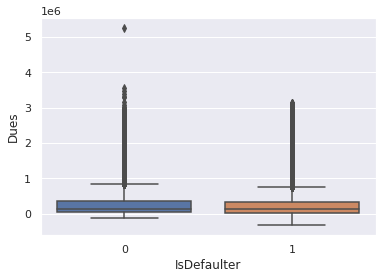

In [ ]:
#plotting dues using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Dues' )

In [ ]:
#rename column names
balanced_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


**Label Encoding**

In [ ]:
#Label encoding implemented
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
balanced_df = balanced_df.replace(encoders_nums)

**One Hot Encoding**

In [ ]:
#One Hot encoding implemented on Education and marriage features
balanced_df = pd.get_dummies(balanced_df,columns=['EDUCATION','MARRIAGE'])

**Age Feature is divided into 6 groups**

In [ ]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
balanced_df['AGE'] = pd.cut(balanced_df['AGE'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
balanced_df.AGE = balanced_df.AGE.cat.codes

**Correlation Heatmap**

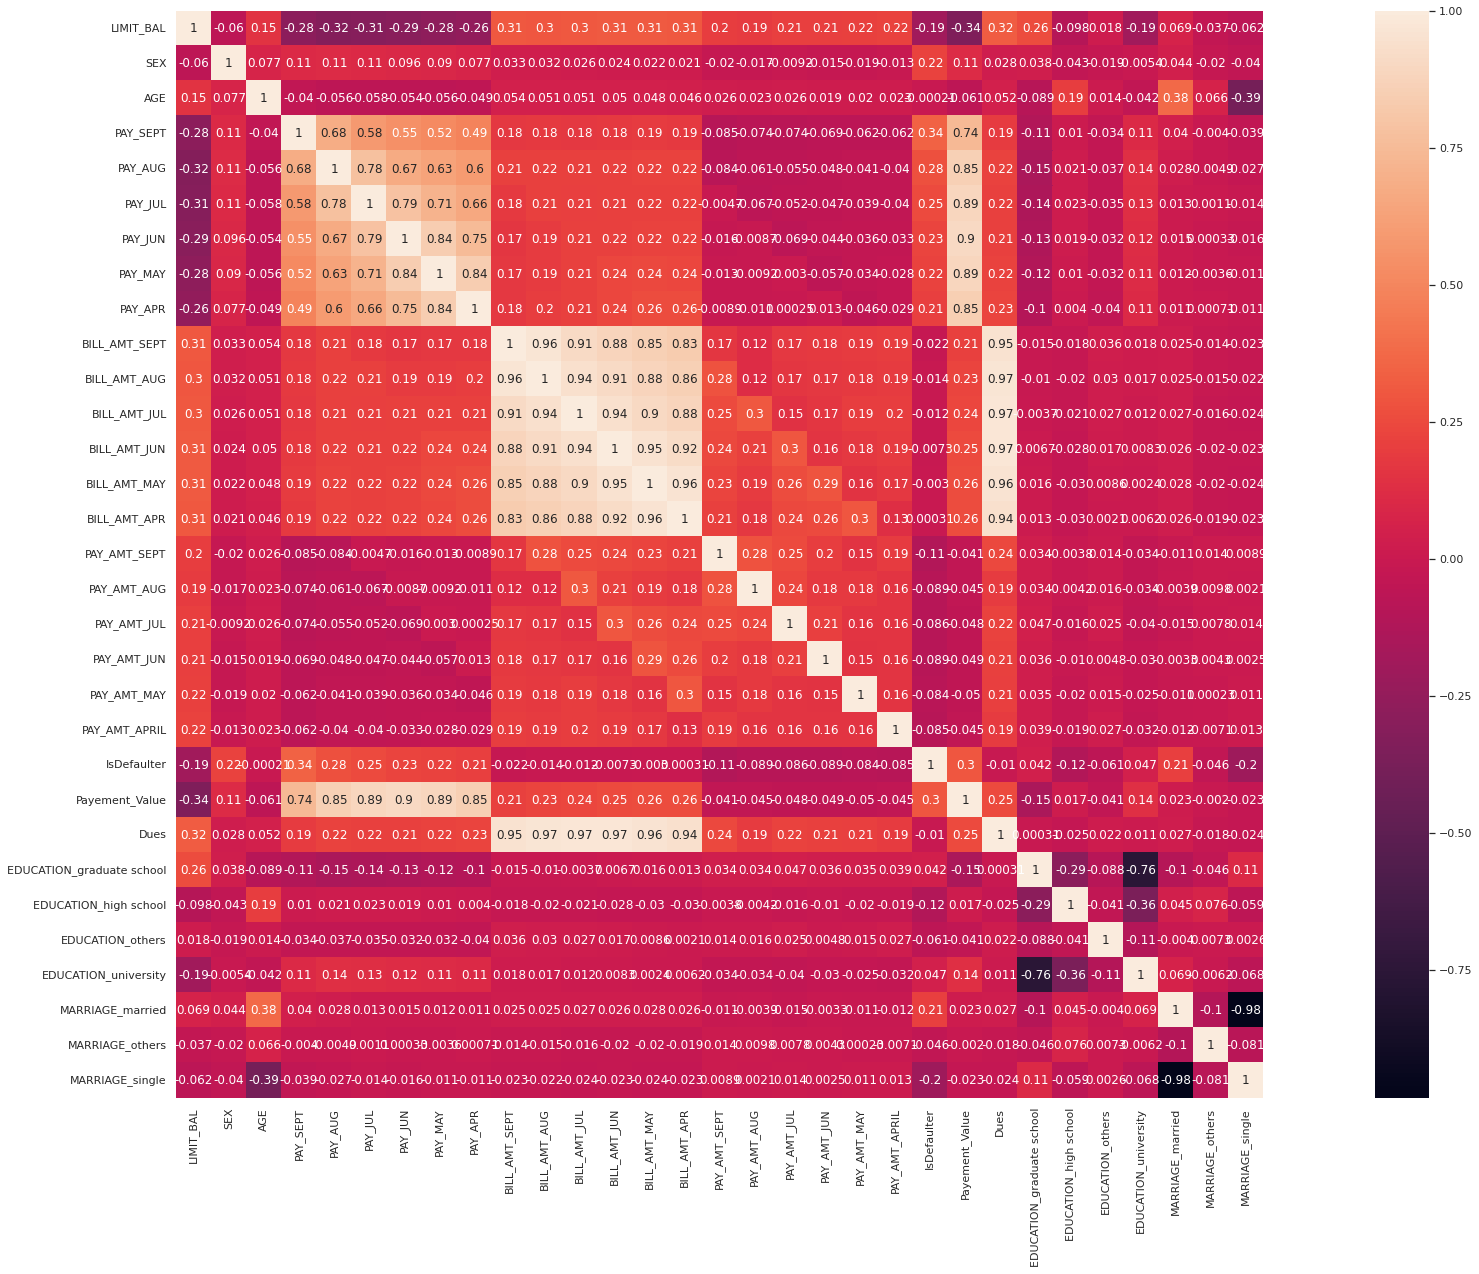

In [ ]:
#plot heatmap

correlation = balanced_df.corr()
plt.subplots(figsize=(40,20))
sns.heatmap( correlation, square=True, annot=True)

**Separating Dependent and Independent Variable**

In [ ]:
#Independent variables 
X = balanced_df.drop(columns=['IsDefaulter','Payement_Value','Dues'],axis=1)
#dependent variable
y = balanced_df['IsDefaulter']

In [ ]:
cols = X.columns

**Rescaling values using Standard Scaler**

In [ ]:
#Rescaling independent features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Train Test Split** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

**Model Training and Hyper Parameter Tuning**

**Random Forest Classifier**

In [ ]:
#Instantiate Random Forest Classifier
rf_clf = RandomForestClassifier()

#Fit the model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9979185160243657
The accuracy on test data is  0.8352260552817656
The precision on test data is  0.8208571428571428
The recall on test data is  0.8451242829827916
The f1 on test data is  0.8328139720269586
The roc_score on test data is  0.8355029912553502


**Hyperparameter tuning of Random Forest**

In [ ]:
# Create parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [ ]:
# Instantiate grid search model
grid_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                          cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [ ]:
#get best parameters
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 150}

In [ ]:
#get best score
grid_search.best_score_

0.8123296965289301

In [ ]:
#get best estimator which can be used for prediction
optimal_rf_clf = grid_search.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
test_class_preds

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
y_test

18914    1
12679    0
29905    0
4689     0
33746    1
        ..
23938    0
8614     0
20189    1
506      0
5822     0
Name: IsDefaulter, Length: 14001, dtype: int64

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9519422082096177
The accuracy on test data is  0.8194414684665381
The precision on test data is  0.7987142857142857
The recall on test data is  0.8332339791356185
The f1 on test data is  0.8156090444930707
The roc_score on test data is  0.8199910123356051


In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

**Confusion Matrix of Random Forest**

[[5882 1119]
 [1409 5591]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

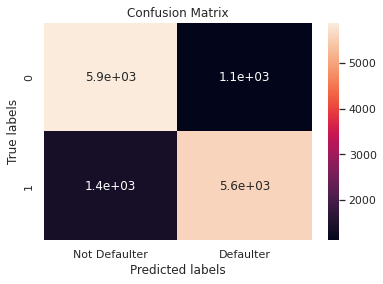

In [ ]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

**Feature Importance of Random Forest Model**

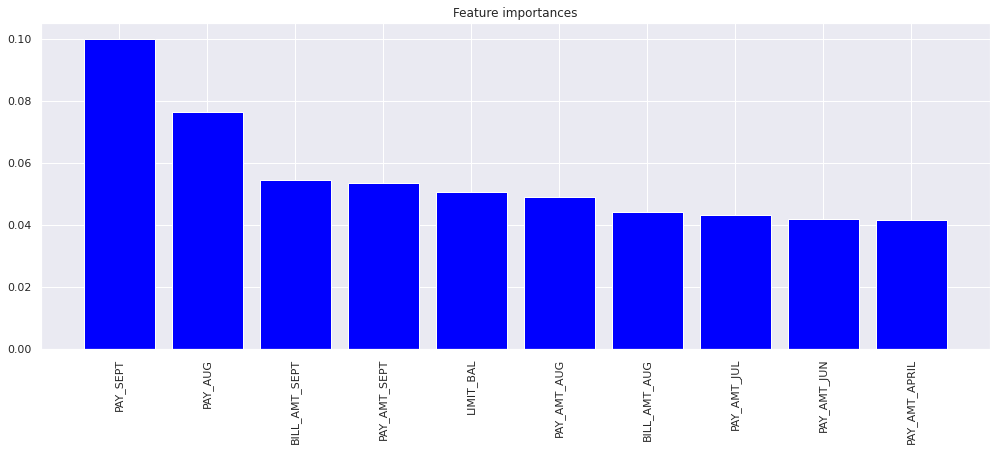

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = cols,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="blue",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 90)
plt.show()

In [ ]:
def plot_feat_imp(X_train, model):
    """
    Prints the model feature importances
    """
    feat_imp = pd.DataFrame(
        {"Feature": X_train.columns, "Feature Importance": model.feature_importances_}
    )
    feat_imp.sort_values(by="Feature Importance", ascending=False, inplace=True)
    plt.figure(figsize=(10, 5))
    plt.title(f"Feature Importance of {model}", fontsize=14)
    ax = sns.barplot(x="Feature", y="Feature Importance", data=feat_imp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()
    
def get_model_results(X_train, X_test, y_train, y_test, model, feat_imp=False):
    """
    Prints the training and test metrics and plots the confusion matrices.
    Also plots the feature importance based on the user choosing the parameter variable,
    and returns the evaluation metrics.
    """
    # Fit training model to training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model
    y_train_pred = model.predict(X_train)
    y_train_pred_probs = model.predict_proba(X_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)

    # Get confusion matrix
    train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    test_matrix = metrics.confusion_matrix(y_test, y_test_pred)

    # Get F1 score
    f1_train = metrics.f1_score(y_train, y_train_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)

    # Print the train and test roc_auc_score
    #and test confusion matrix
    print(
        f"ROC_AUC_Score of train set is {metrics.roc_auc_score(y_train, y_train_pred_probs[:, 1])}."
    )
    print(
        f"ROC_AUC_Score of test set is {metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])}."
    )
    #print("Confusion matrix of test set\n", confusion_matrix(y_test, y_test_pred))
    #print(
    #    "Classification Report of test set\n",
    #    metrics.classification_report(y_test, y_test_pred),
    #)
    
    # Display scores
    print(f"F1 of train set is {f1_train.round(4)}.")
    print(f"F1 of test set is {f1_test.round(4)}.")

    # Plot training and test confusion matrices
    plt.figure(figsize=(12, 4))
    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    train_percent = [
        "{0:.2%}".format(value)
        for value in train_matrix.flatten() / np.sum(train_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, train_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.subplot(1, 2, 1)
    sns.heatmap(train_matrix, annot=labels, fmt="", cmap="Blues")
    plt.title("Train Set\n")

    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    test_percent = [
        "{0:.2%}".format(value) for value in test_matrix.flatten() / np.sum(test_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, test_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.subplot(1, 2, 2)
    sns.heatmap(test_matrix, annot=labels, fmt="", cmap="Blues")
    plt.title("Test Set\n")

    plt.subplots_adjust(wspace=0.2)

    #plt.figure(figsize=(7, 4))
    #plot_roc_curve(model, X_test, y_test)
    #plt.show()

    if feat_imp == True:
        plot_feat_imp(X_train, model)
    elif feat_imp == "LR":
        # Get feature coefficients
        importance = model.coef_[0]

        df_feat_imp = pd.DataFrame(
            columns=["Feature", "Feature Importance (Value of Coefficient)"]
        )
        
        # Attach feature coefficients to labels
        for i, v in enumerate(importance):
            df_feat_imp = df_feat_imp.append(
                {
                    "Feature": X_train.columns[i],
                    "Feature Importance (Value of Coefficient)": v,
                },
                ignore_index=True,
            )

            #print(f"{X_train.columns[i]} Feature: %0d, Score: %.5f" % (i, v))
        
        # Sort them by their absolute values in descending order
        df_feat_imp = df_feat_imp.reindex(
            df_feat_imp["Feature Importance (Value of Coefficient)"]
            .abs()
            .sort_values(ascending=False)
            .index
        )
        
        # Plot a bargraph
        plt.figure(figsize=(10, 5))
        plt.title(f"Feature Importance of {model}", fontsize=14)
        ax = sns.barplot(x="Feature", y="Feature Importance (Value of Coefficient)", data=df_feat_imp)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()
        
    else:
        pass
    
    return metrics.accuracy_score(y_test, y_test_pred),\
           metrics.precision_score(y_test, y_test_pred),\
           metrics.recall_score(y_test, y_test_pred),\
           metrics.f1_score(y_test, y_test_pred),\
           metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])

ROC_AUC_Score of train set is 0.7936328248666149.
ROC_AUC_Score of test set is 0.794292876527843.
F1 of train set is 0.7212.
F1 of test set is 0.7208.


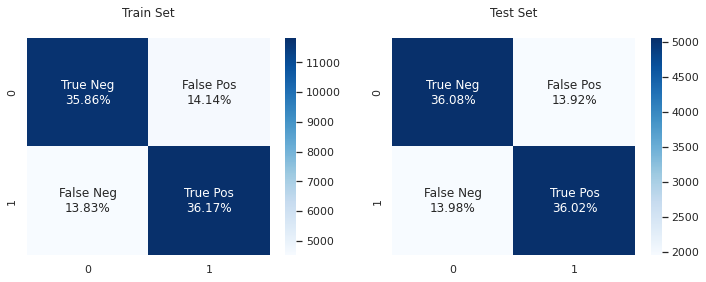

In [ ]:
# Instantiate a Logistic Regression model
log_model = LogisticRegression(random_state=0, max_iter=200)

# Train the model on the original data set and diplay the performance
acc, prec, rec, f1, auc = get_model_results(X_train, X_test, y_train, y_test, log_model)